<a href="https://colab.research.google.com/github/junghyun9108/NLP_class/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 22.0 MB/s eta 0:00:00


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By

URL = "https://news.naver.com/"

options = webdriver.ChromeOptions()
options.add_argument(" --headless")
options.add_argument(" --disable-dev-shm-usage")
options.add_argument(" --no-sandbox")
driver = webdriver.Chrome(options=options)
driver.get(URL)
print(driver.title)

네이버 뉴스


In [11]:
comment_texts = driver.find_elements(By.CLASS_NAME, 'comment_text')
for tmp in comment_texts:
    print(tmp.text)

In [7]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [22]:
import re

clean_titles = []

# strong 태그에 클래스가 cnf_news_title인 요소 모두 선택
titles = soup.select('strong.cnf_news_title')

# 텍스트만 출력
for tag in titles:
    raw = tag.get_text(strip=True)
    clean = re.sub(r'^\[.*?\]\s*', '', raw)
    clean_titles.append(clean)

print(clean_titles)

['봉지욱 등 \'공소기각\' 주장에... 尹 명예훼손 재판부 "일단 재판"', "Wildfire on Daegu's Mount Hamji tears through 140 acres", '대구 함지산 대형 산불…대응 최고 3단계 발령', '"집앞까지 불씨, 상상도 못했다" 산불 공포, 잠 못드는 대구', '정부, 지역별 차등전기료 제동', "'보수 품기'에 속도 낸 이재명…한덕수 측근 사직서 제출[박지환의 뉴스톡]", '특수교육 고교생 흉기 난동에 본인 포함 7명 부상…교육당국 "대응 논의"(종합)', "대선 주자 AI 공약 '공염불'…원전 없이 전기공급 어떻게?", '교황청 "새 교황 선출 콘클라베 내달 7일 시작"', '국민의힘 경선 투표 마감…최종 2인은 누구?', '대학원생 성폭행한 교수, "1억 안주면 녹음파일 유포" 협박까지', '1,600실 중 1,500실 예약 “연휴 만실 찍었다”.. 외국인 상생버스로 누웨마루  살린다', '청주 고교서 학생이 ‘흉기난동’... 가방엔 망치 등 흉기 다수', 'SKT, 정보 유출 공포에 가입자 ‘무더기 이탈’', '한국 토종 애니, 미국서 단 17일만에 ‘기생충’ 매출액 넘었다', '이준석 “과감한 규제 해제로 전 국민 AI 활용 국가 만들 것”', '월세 180만원 받는 김부장, 이거 깜빡하면 세금폭탄?', '"해킹한 개인정보 2000만원에 팝니다"…콜센터·GA도 해킹됐다', "이승만 참배, 윤여준 영입...'통합' 내걸고 본선 돌입", 'SKT 해킹 후폭풍…하루 만에 가입자 1665명 이탈', '대구 함지산 불 확산에…소방청 ‘국가 소방동원령’ 발령', '"이번주 해외 출장 가야 하는데 어쩌지"…난감한 SKT 고객들', "대구 산불 확산에 '국가소방동원령'…요양시설 거주자 61명 대피(종합2보)", 'SKT 해킹…유심칩 꼭 바꿔야 할까', '"대구 북구 산불, 입산통제구역서 발화 추정…주민 대피령"', '대구 함지산 산불, 입산 통제구역서 발화..야간에도 진화', '"너무 많이 차린다 했더니"… 청년들 뛰어들

In [31]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 24.8 MB/s eta 0:00:00


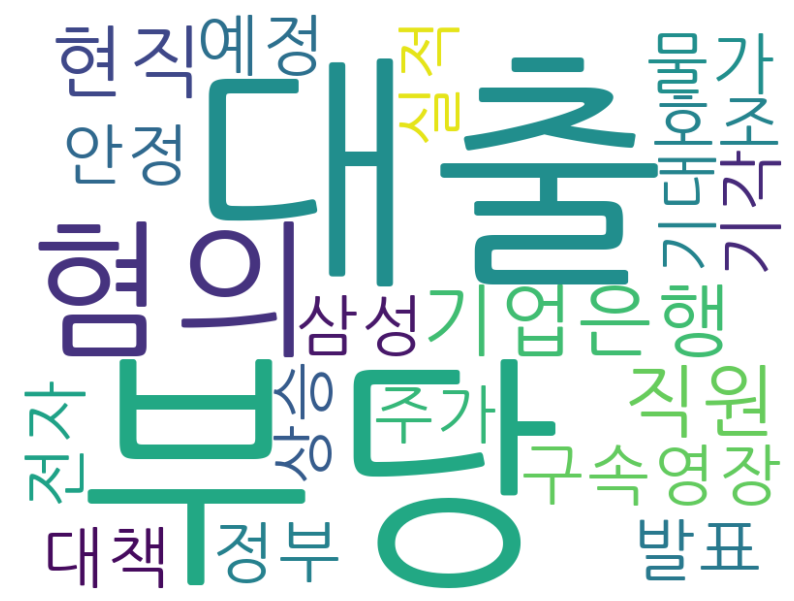

In [32]:
import re
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 네이버 뉴스 페이지에서 제목만 가져와 clean_titles에 저장했다고 가정
# clean_titles = ['785억 부당대출 혐의’ 기업은행 전·현직 직원 구속영장 기각', …]

# 2. 모든 제목을 하나의 문자열로 합치기
text = ' '.join(clean_titles)

# 3. 형태소 분석기로 명사만 추출 (길이 2자 이상 필터)
okt = Okt()
nouns = okt.nouns(text)
filtered = [word for word in nouns if len(word) > 1]

# 4. 단어 빈도 계산
counts = Counter(filtered)

# 5. 워드클라우드 생성
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'  # 환경에 맞게 폰트 경로 설정
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=600
)
wc.generate_from_frequencies(counts)

# 6. 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
